---
# Multiclasificación de los estados del cohete

---
#### **Los objetivos de este notebook son:**

✅ Task 1 → Realizar un análisis exploratorio de los datos.

✅ Task 2 → Realizar un modelo predictivo que permita conocer los tipos de estados del cohete en función de variables predictoras.

✅ Task 3 → La calidad de la predicción se medirá a partir del f1-score (macro).

<h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>Tabla de contenidos</center></h1>

<ul class="list-group" style="list-style-type:none;">
    <li><a href="#1" class="list-group-item list-group-item-action">1. Introducción</a></li>
    <li><a href="#2" class="list-group-item list-group-item-action">2. Preparación de los datos</a>
        <ul class="list-group" style="list-style-type:none;">
            <li><a href="#2.1" class="list-group-item list-group-item-action">2.1 Características de los datos</a></li>
            <li><a href="#2.2" class="list-group-item list-group-item-action">2.2 Importar librerías</a></li>
            <li><a href="#2.3" class="list-group-item list-group-item-action">2.3 Funciones auxiliares</a></li>
             <li><a href="#2.4" class="list-group-item list-group-item-action">2.4 Leer los datos</a></li>
            <li><a href="#2.5" class="list-group-item list-group-item-action">2.5 Procesamiento de los datos</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#2.4.1" class="list-group-item list-group-item-action">2.5.1 Tipología</a></li>
                    <li><a href="#2.4.2" class="list-group-item list-group-item-action">2.5.2 Datos duplicados</a></li>
                    <li><a href="#2.4.3" class="list-group-item list-group-item-action">2.5.3 Visualización de los datos</a></li>
                    <li><a href="#2.4.4" class="list-group-item list-group-item-action">2.5.4 Descripción estadística de los datos</a></li>
                    <li><a href="#2.4.5" class="list-group-item list-group-item-action">2.5.5 Observaciones de características</a></li>
                    <li><a href="#2.4.6" class="list-group-item list-group-item-action">2.5.6 Tratamiento de los datos outliers</a></li>
                </ul>
            </li>
            <li><a href="#2.6" class="list-group-item list-group-item-action">2.6 EDA</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#2.6.1" class="list-group-item list-group-item-action">2.6.1 Correlación de las variables</a></li>
                    <li><a href="#2.6.2" class="list-group-item list-group-item-action">2.6.2 Análisis del target</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li><a href="#3" class="list-group-item list-group-item-action">3. Algoritmo</a>
        <ul class="list-group" style="list-style-type:none;">
            <li><a href="#3.1" class="list-group-item list-group-item-action">3.1 Feature Selection</a></li>
            <li><a href="#3.2" class="list-group-item list-group-item-action">3.2 Gated Residual</a>
                <ul class="list-group" style="list-style-type:none;">
                    <li><a href="#3.2.1" class="list-group-item list-group-item-action">3.2.1 Modelo</a></li>
                    <li><a href="#3.2.2" class="list-group-item list-group-item-action">3.2.2 Evaluación y resultados</a></li>
                    <li><a href="#3.2.3" class="list-group-item list-group-item-action">3.2.3 Predicción del nuevo dataset</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li><a href="#4" class="list-group-item list-group-item-action">4. Conclusiones</a></li>
    <li><a href="#5" class="list-group-item list-group-item-action">5. Referencias</a></li>
</ul>


<a id ="1"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>1. Introducción</center></h1>

**Space Exploration Technologies Corp.**, conocida como SpaceX, es una empresa estadounidense de fabricación aeroespacial y de servicios de transporte espacial con sede en Hawthorne (California). Fue fundada en 2002 por Elon Musk con el objetivo de reducir los costes de viajar al espacio para facilitar la colonización de Marte.[1]
Para ello nos ha proporcionado los datos de varios sensores y su estado. ¿El objetivo? Crea un modelo que sea capaz de predecir el estado.

En este dataset consta de 5 estados: Estable, Turbulencia Ligera, Turbulencia Moderada, Turbulencia Severa y Turbulencia Extrema. 

El éxito para la compañía sería que todos los sensores registrasen el estado **Estable**. Pero debido a que estamos realizando todas las comprobaciones, necesitamos saber qué tipo de turbulencias presenta los cohetes.

<a id ="2"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>2. Preparación de los datos</center></h1>

La organización de este estudio nos ha proporcionado dos datasets. Estos tienen las mismas características pero uno no tiene el target debido a que se tratarán como datos nuevos que una vez hemos creado el algoritmo para clasificar el estado de los sensores de los cohetes.

<a id ="2.1"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.1 Características de los datos</center></h2> 


- **train.csv** - Consta de 2100 entradas y 7 características.
    * `sensor_1`: Miden las vibraciones detectadas en el cohete
    * `sensor_2`: Miden las vibraciones detectadas en el cohete.
    * `sensor_3`: Miden las vibraciones detectadas en el cohete
    * `sensor_4`: Miden las vibraciones detectadas en el cohete
    * `sensor_5`: Miden las vibraciones detectadas en el cohete
    * `sensor_6`: Miden las vibraciones detectadas en el cohete

    * `Target`: Categoría del estado del cohete.
        - 0 -> Estable
        - 1 -> Turbulencia Ligera
        - 2 -> Turbulencia Moderada
        - 3 -> Turbulencia Severa
        - 4 -> Turbulencia Extrema
    
- **test.csv** - Consta de 900 entradas y 6 características.

<a id ="2.2"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.2 Importar librerías</center></h2> 

A continuación vamos a importar todas las librerías necesarias para la realización del todo el algoritmo.

In [83]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from scipy.stats import zscore
from scipy.stats import iqr
from scipy import stats
from scipy.stats import norm

import os
import gc

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

from scipy.stats import zscore
from scipy.stats import iqr
from sklearn.feature_selection import SelectKBest

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# setting some globl config
plt.style.use('fivethirtyeight')
cust_color = ['#fdc029', '#f7c14c', '#f0c268', '#e8c381', '#dfc498', '#d4c5af', '#c6c6c6',
              '#a6a6a8', '#86868a', '#68686d', '#4b4c52', '#303138', '#171820']
darks = ['#4e5560','#866a67','#9a9385','#c5bfa7','#e6dbc8']
cmap_darks = sns.color_palette(darks)
cmap_cust = sns.color_palette(cust_color)
sns.set_palette(cmap_cust)
sns.set_palette(cmap_darks)

<a id ="2.3"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.3 Funciones auxiliares</center></h2> 

In [11]:
def colour_map(value):
    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'
    else:
        color = "black"
        
    return "color: %s" %color

###################################################################################
# feature selection
def select_features_mutual(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

###################################################################################
# define helper functions
def set_seed(seed):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    print(f"Seed set to: {seed}")

###################################################################################
def plot_eval_results(scores, n_splits):
    cols = 10
    rows = int(np.ceil(n_splits/cols))
    
    fig, ax = plt.subplots(rows, cols, tight_layout=True, figsize=(25,3.5))
    ax = ax.flatten()
    
    for fold in range(len(scores)):
        df_eval = pd.DataFrame({'train_loss': scores[fold]['loss'], 'valid_loss': scores[fold]['val_loss']})

        sns.lineplot(
            x=df_eval.index,
            y=df_eval['train_loss'],
            label='train_loss',
            ax=ax[fold]
        )

        sns.lineplot(
            x=df_eval.index,
            y=df_eval['valid_loss'],
            label='valid_loss',
            ax=ax[fold]
        )

        ax[fold].set_ylabel('')
  
    sns.despine()

###################################################################################    
def plot_cm(cm):
    metrics = {
        'accuracy': cm / cm.sum(),
        'recall' : cm / cm.sum(axis=1),
        'precision': cm / cm.sum(axis=0)
    }
    
    fig, ax = plt.subplots(1,3, tight_layout=True, figsize=(10,10))
    ax = ax.flatten()

    mask = (np.eye(cm.shape[0]) == 0) * 1

    for idx, (name, matrix) in enumerate(metrics.items()):

        ax[idx].set_title(name)

        sns.heatmap(
            data=matrix,
            cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            cbar=False,
            mask=mask,
            lw=0.25,
            annot=True,
            fmt='.2f',
            ax=ax[idx]
        )
    
    sns.despine()

<a id ="2.4"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.4 Leer los datos</center></h2> 

A continuación vamor a leer los dos conjuntos de datos. Veremos las características que conforman los dos conjuntos. Como hemos mencionado anteriormente la primera columna `Unnamed: 0` se deberá eliminar ya que es una columna que no conforma característica propia de los datos. En el conjunto de `train` tiene finalmente 7 columnas, 6 características y 1 variable objetivo (target). En el conjunto `test` tiene 6 columnas y sin variable objetivo.

In [3]:
train = pd.read_csv('space_X_train(1).csv')
test = pd.read_csv('space_X_test(1).csv')

In [4]:
train.head()

,Unnamed: 0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [5]:
print('Tamaño de los datos en bruto: ')
print('Train: \t',train.shape, '\nTest: \t',test.shape)

Tamaño de los datos en bruto: 
Train: 	 (2100, 8) 
Test: 	 (900, 7)


<a id ="2.5"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.5 Preprocesamiento de los datos</center></h2> 

Como hemos mencionado la columna `Unnamed: 0` se elimará y mostraremos el tamaño definitivo de los datos preparados para empezar el preprocesamiento.

In [6]:
train = train.drop(['Unnamed: 0'],axis=1)
test = test.drop(['Unnamed: 0'],axis=1)

In [7]:
print('Tamaño de los datos en neto: ')
print('Train: \t',train.shape, '\nTest: \t',test.shape)

Tamaño de los datos en neto: 
Train: 	 (2100, 7) 
Test: 	 (900, 6)


<a id ="2.5.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.5.1 Tipología del dato </center></h2>

En este apartado vamos a ver la información genérica del conjunto del dataset. 

**train:**

Podemos observar las siguientes características:

 - 6 características tipo `float` y 1 característica tipo `int`. 
 - No hay presencia de valores faltantes.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor_1  2100 non-null   float64
 1   sensor_2  2100 non-null   float64
 2   sensor_3  2100 non-null   float64
 3   sensor_4  2100 non-null   float64
 4   sensor_5  2100 non-null   float64
 5   sensor_6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB


**test:**

Podemos observar las siguientes características:

 - 6 características tipo `float`. 
 - No hay presencia de valores faltantes.

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sensor_1  900 non-null    float64
 1   sensor_2  900 non-null    float64
 2   sensor_3  900 non-null    float64
 3   sensor_4  900 non-null    float64
 4   sensor_5  900 non-null    float64
 5   sensor_6  900 non-null    float64
dtypes: float64(6)
memory usage: 42.3 KB


<a id ="2.5.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.5.2 Datos duplicados </center></h2>

En este apartado, vamos a averiguar si hay entradas de datos duplicados. Si hubiesen sería necesario eliminarlos debido a que pueden afectar tanto al análisis de los datos como al entrenamiento del modelo. 

En nuestro caso, no hay datos duplicados ni en el conjunto `train` ni en el conjunto `test`.

In [10]:
print('Número de datos duplicados: ')
print('Conjunto df_train:\t', train[train.duplicated()==True].shape[0])
print('Conjunto df_test:\t', test[test.duplicated()==True].shape[0])

Número de datos duplicados: 
Conjunto df_train:	 0
Conjunto df_test:	 0


<a id ="2.5.3"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.5.3 Visualización general de los datos</center></h2>

La visualización de los datos antes de realizar cualquier cualquier acción es muy importante para darnos una visión general sobre la distribución de estos. 

<a id ="2.5.3.1"></a><h3 style="background:#41fa9a; border:0; border-radius: 12px; color:black"><center>2.5.3.1 Train</center></h3>

Vamos a ver la distribución de densidades para el conjunto de entenamiento:

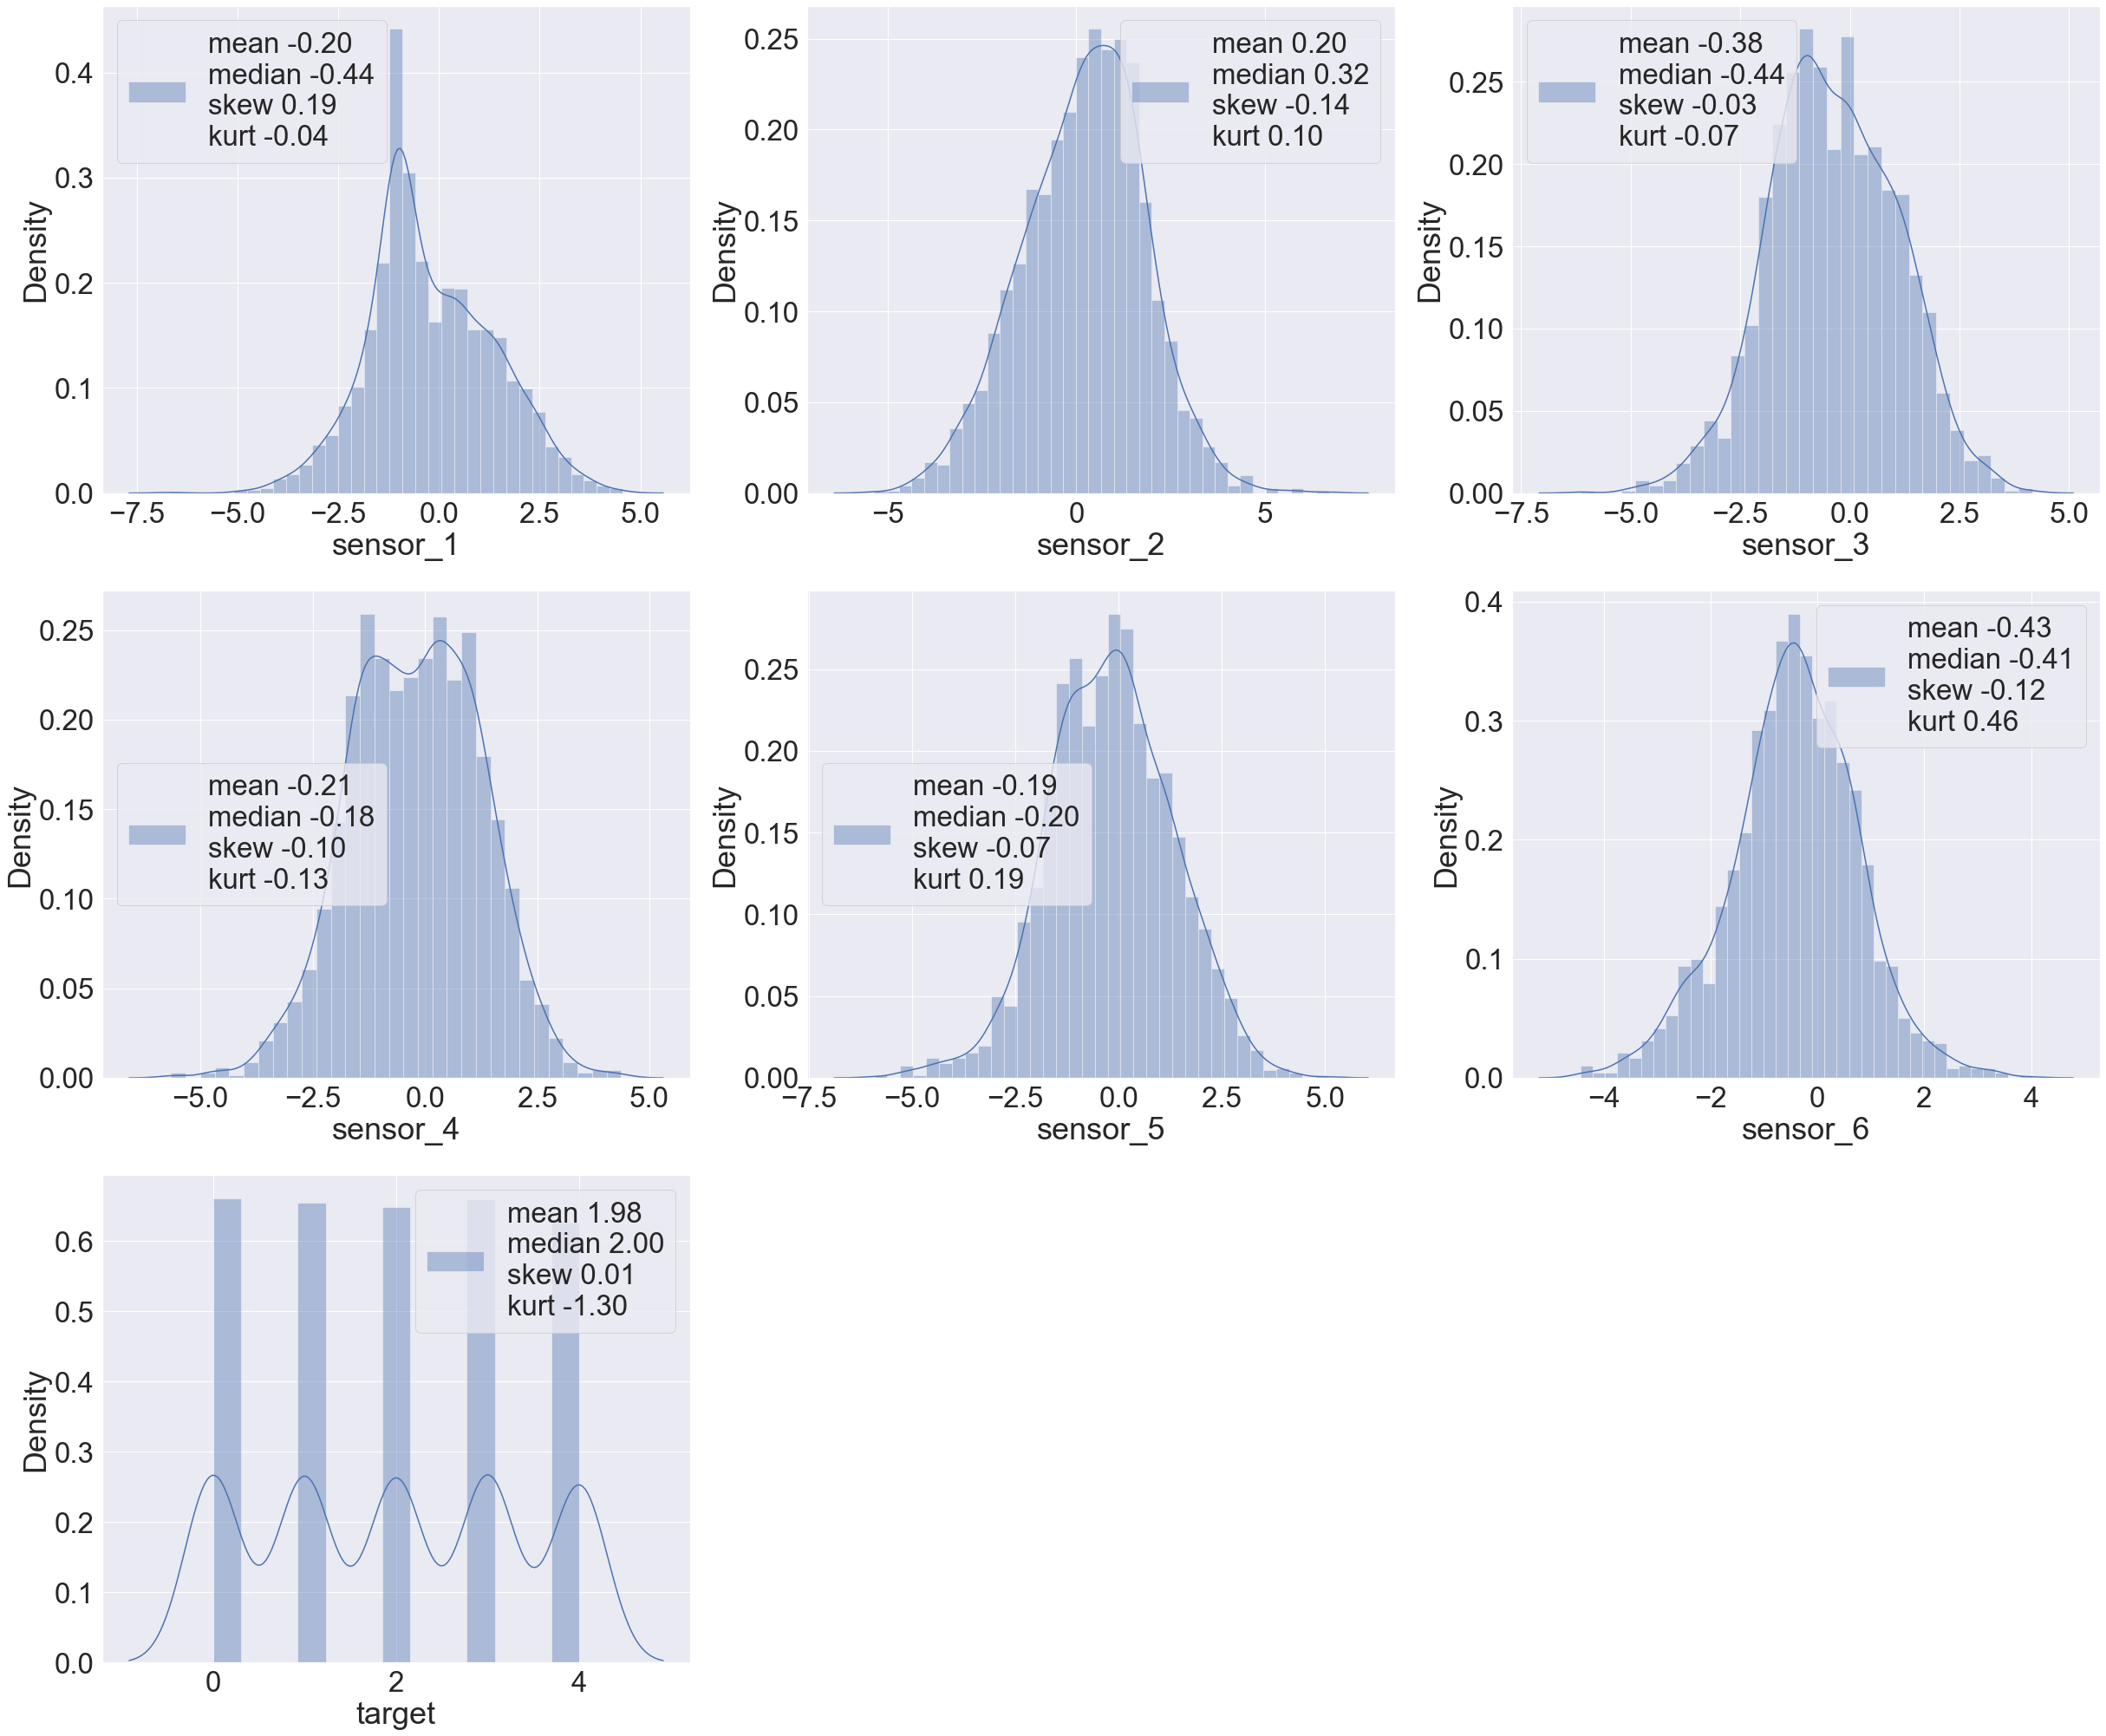

In [13]:
sns.set(font_scale=3)
cols = train.columns
n_row = len(cols)
n_col = 3
n_sub = 1
fig = plt.figure(figsize=(20,40))
for i in range(len(cols)):
    plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(train[cols[i]],norm_hist=False,kde=True,
                 label=['mean '+str('{:.2f}'.format(train.iloc[:,i].mean()))
                        +'\n''median '+str('{:.2f}'.format(train.iloc[:,i].median()))
                        +'\n''skew '+str('{:.2f}'.format(train.iloc[:,i].skew()))
                        +'\n''kurt '+str('{:.2f}'.format(train.iloc[:,i].kurtosis()))])                                                        
    n_sub+=1
    plt.legend()
plt.show()

En este gráfico hay algunos datos interesantes a destacar:
En términos genéricos podemos ver que las variables predictoras recuerdan a `distribuciones Gaussianas`. La variable target parece que muestra datos balanceados. Por lo que este problema estaría clasificado dentro de multiclasificación balanceado. 

<a id ="2.5.3.2"></a><h3 style="background:#41fa9a; border:0; border-radius: 12px; color:black"><center>2.5.3.2 Test</center></h3>

Vamos a ver la distribución de densidades para el conjunto de test:

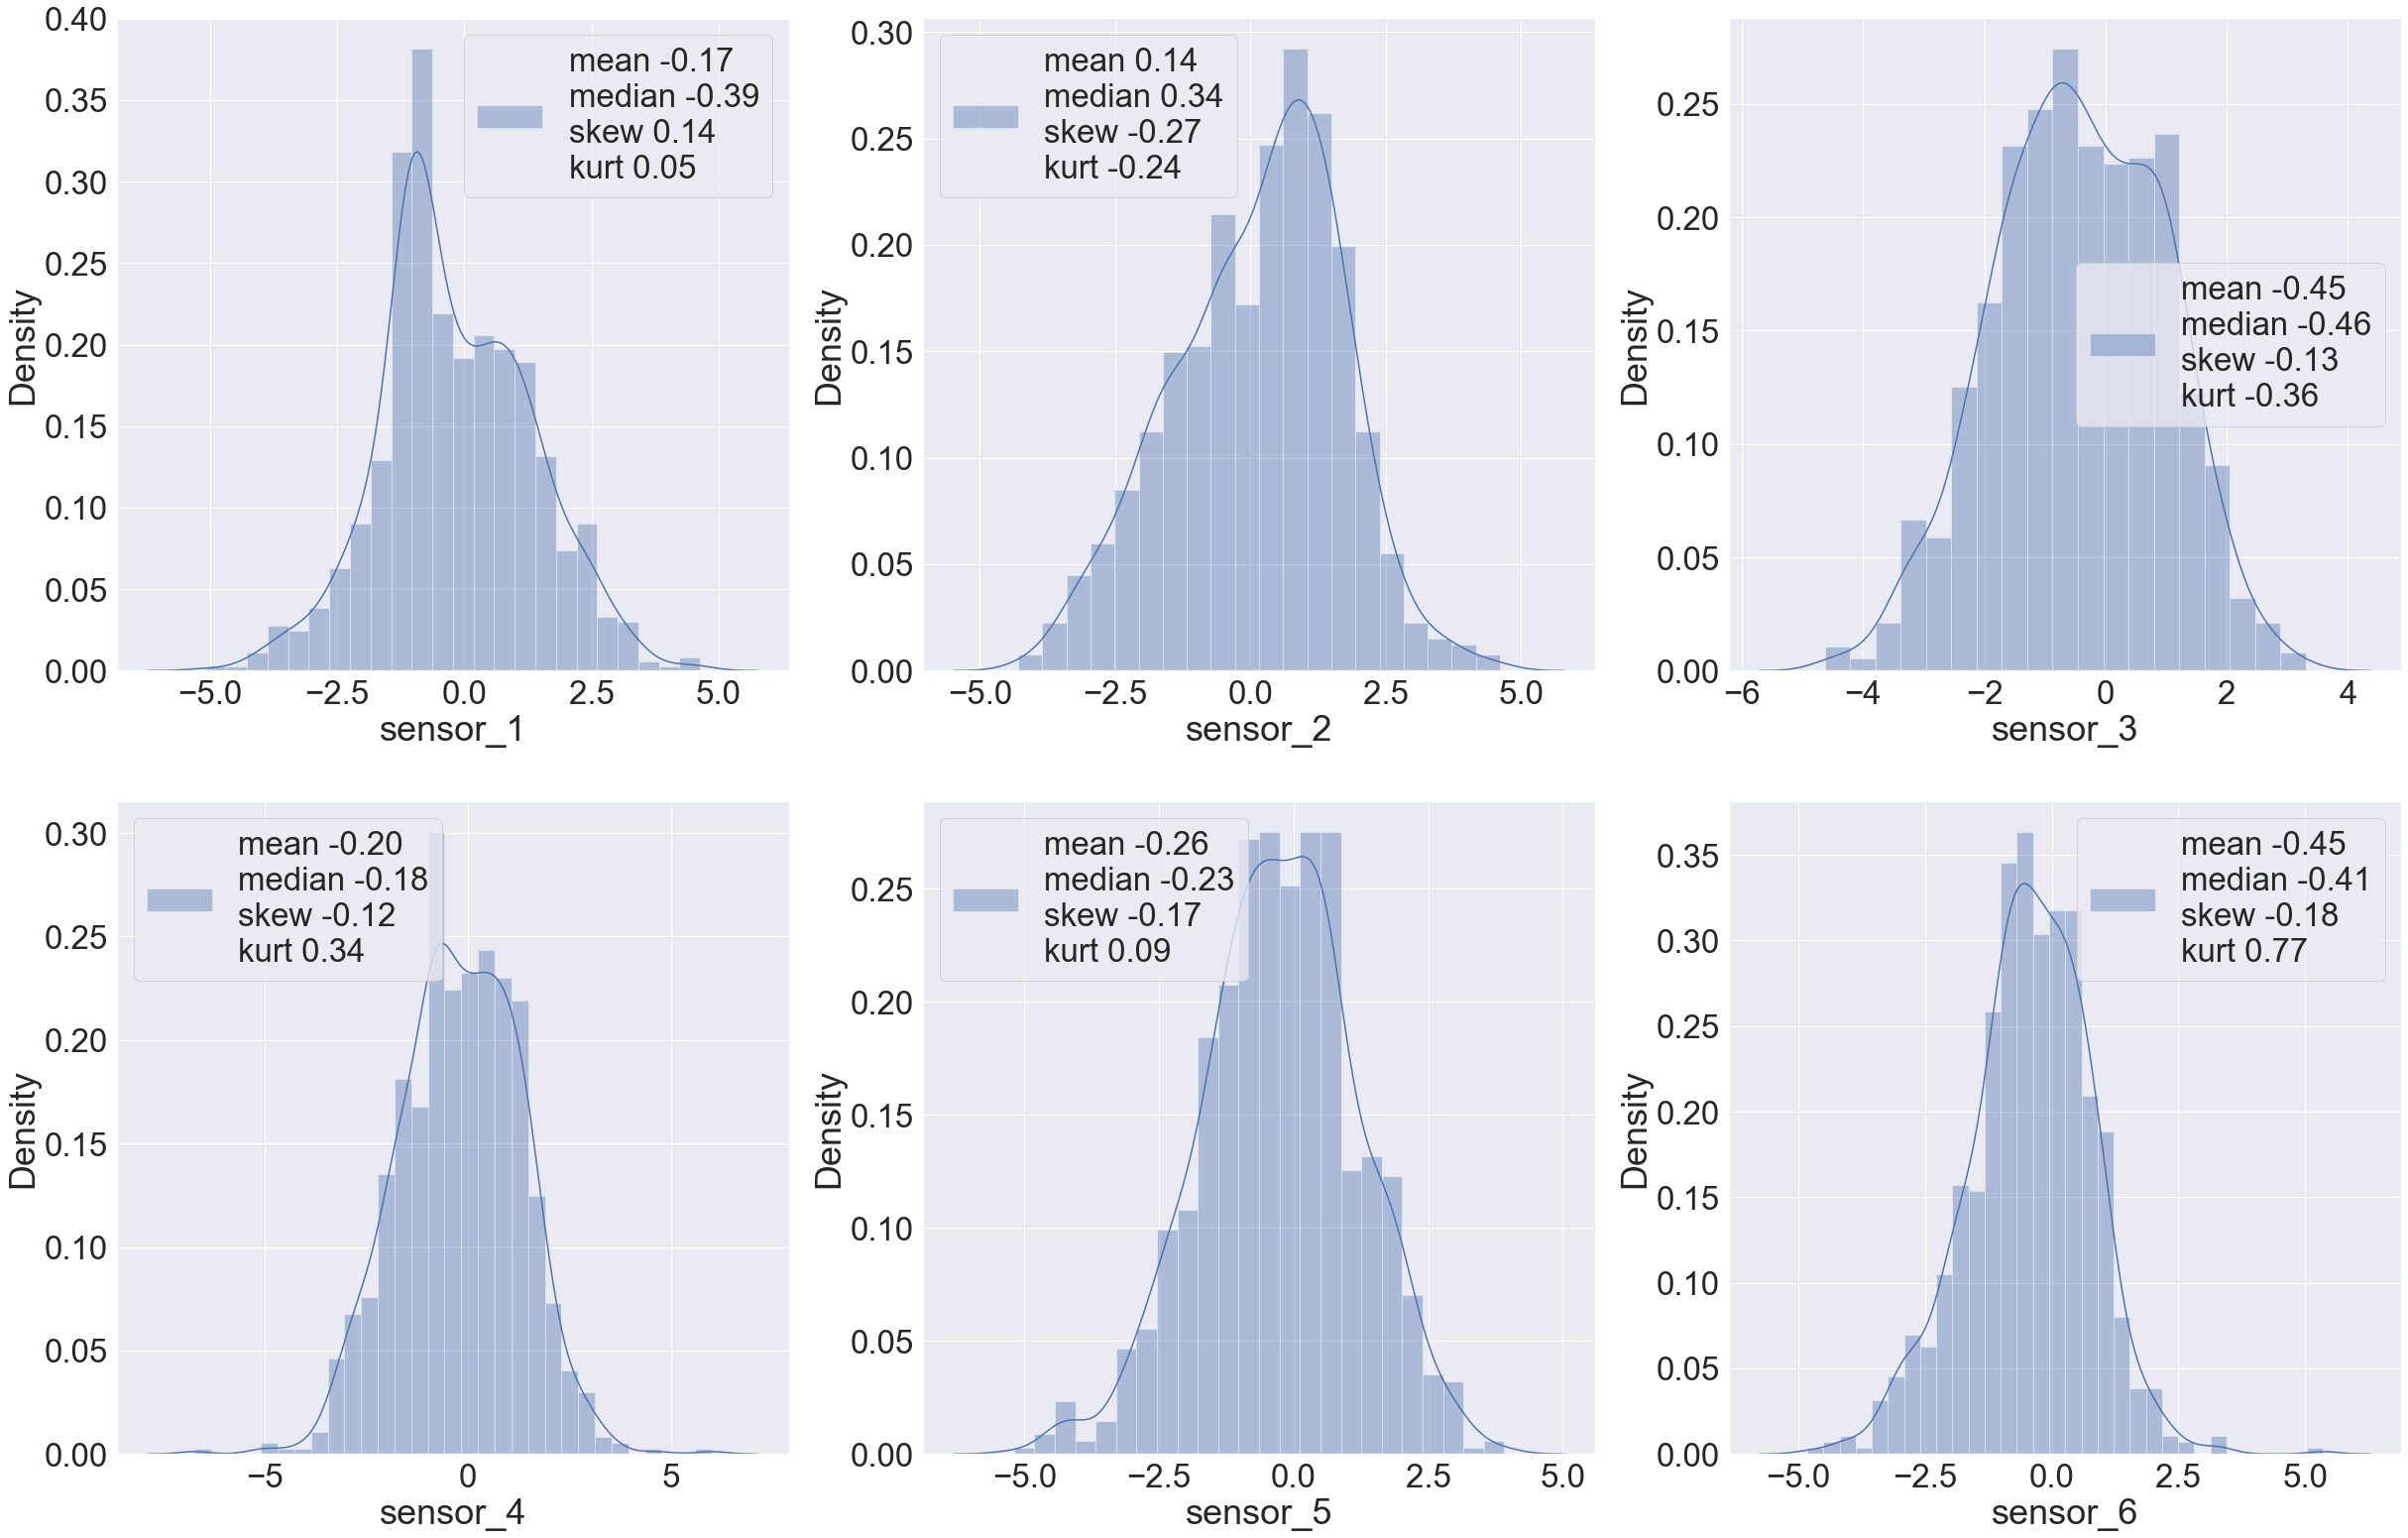

In [14]:
sns.set(font_scale=3)
cols = test.columns
n_row = len(cols)
n_col = 3
n_sub = 1
fig = plt.figure(figsize=(20,40))
for i in range(len(cols)):
    plt.subplots_adjust(left=-0.3, right=1.3, bottom=-0.3, top=1.3)
    plt.subplot(n_row, n_col, n_sub)
    sns.distplot(test[cols[i]],norm_hist=False,kde=True,
                 label=['mean '+str('{:.2f}'.format(test.iloc[:,i].mean()))
                        +'\n''median '+str('{:.2f}'.format(test.iloc[:,i].median()))
                        +'\n''skew '+str('{:.2f}'.format(test.iloc[:,i].skew()))
                        +'\n''kurt '+str('{:.2f}'.format(test.iloc[:,i].kurtosis()))])                                                        
    n_sub+=1
    plt.legend()
plt.show()

En términos generales, vemos que las distribuciones de las variables predictoras nos recuerda a distribuciones Gaussianas. 

Veremos las siguientes variables más detenidamente una por una a continuación, en el siguiente apartado.

<a id ="2.5.4"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.5.4 Descripción estadística de los datos</center></h2>

En este apartado se verá la descripción de los datos enfocado a la estadística. Añadiremos color verde para los datos positivos y rojo para los negativos. También añadiremos estadísticos adicionales: `varianza`, `skew` y `kurtosis`. 


<a id ="2.5.4.1"></a><h3 style="background:#41fa9a; border:0; border-radius: 12px; color:black"><center>2.5.4.1 Train</center></h3>



In [15]:
stats = train.describe()
stats.loc['var'] = train.var().tolist()
stats.loc['skew'] = train.skew().tolist()
stats.loc['kurt'] = train.kurtosis().tolist()
stats.style.applymap(colour_map)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000
var,2.382740,2.605074,2.104089,2.080013,2.254722,1.413225,1.989614
skew,0.193572,-0.143889,-0.029870,-0.099428,-0.072978,-0.122680,0.012170


Como podemos ver, el rango de las variables predictoras son parecidas. Por lo que `no hace falta estandarizar` el dataset.

<a id ="2.5.4.2"></a><h3 style="background:#41fa9a; border:0; border-radius: 12px; color:black"><center>2.5.4.2 Test</center></h3>

Como en el apartado anterior hemos visto que las distribuciones para el dataset `test` son parecidas a conjunto `train`, las observaciones serán parecidas. No obstante, vamos a mostrarlo por si hay datos incorrectamente recopilados. 

In [16]:
stats_test = test.describe()
stats_test.loc['var'] = test.var().tolist()
stats_test.loc['skew'] = test.skew().tolist()
stats_test.loc['kurt'] = test.kurtosis().tolist()
stats_test.style.applymap(colour_map)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,-0.170339,0.135481,-0.447035,-0.201708,-0.263349,-0.445490
std,1.485402,1.547202,1.394437,1.487102,1.450823,1.215000
min,-5.084203,-4.292548,-4.628992,-6.732089,-5.196997,-4.823971
25%,-1.098759,-0.934171,-1.460497,-1.163163,-1.182667,-1.152891
50%,-0.386297,0.341427,-0.464239,-0.177710,-0.233699,-0.410182
75%,0.881170,1.246296,0.626893,0.870332,0.679282,0.399597
max,4.636012,4.612113,3.299946,5.996929,3.917118,5.357953
var,2.206419,2.393833,1.944455,2.211472,2.104888,1.476224
skew,0.138159,-0.265244,-0.132450,-0.119346,-0.170197,-0.179789


<a id ="2.5.5"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.5.5 Observaciones de características</center></h2>

Aunque nuestro objetivo es hacer un modelo que prediga el tipo de turbulencias, también tenemos que pensar que nuestro objetivo ideal es target = `Estable`. Vamos a hacer una observación más profunda en este tipo de target:

In [200]:
# compare medians
print('Median Comparison by Target')
median_group = train.groupby('target').median()
median_group

Median Comparison by Target


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
target,,,,,,
0,-1.024768,1.066758,-0.933350,0.233759,-0.603399,-1.007739
1,-1.011140,-1.013609,-1.123972,0.083641,-1.051967,-0.650442
2,0.119210,0.140119,0.131767,0.058372,0.530942,-0.037772
3,-0.530551,-0.107207,0.086409,0.143664,0.019239,0.095157
4,1.069860,0.966462,0.060931,-1.000025,0.512215,-0.222704


Como vemos, tenemos que valorar las otras variables predictores respecto a la variable `sensor_1`. El punto de partida es: 

In [18]:
median_group.head(1)

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6
target,,,,,,
0,-1.024768,1.066758,-0.93335,0.233759,-0.603399,-1.007739


**Observaciones:** Respecto al `target 0`:

- Respecto al `sensor_1`: el target 4 es el que presenta mayor distancia.
- Respecto al `sensor_2`: el target 3 es el que presenta mayor distancia.
- Respecto al `sensor_3`: el target 4 es el que presenta mayor distancia.
- Respecto al `sensor_4`: el target 4 es el que presenta mayor distancia.
- Respecto al `sensor_5`: el target 2 es el que presenta mayor distancia.
- Respecto al `sensor_6`: el target 3 es el que presenta mayor distancia.

Es decir, que la distancia entre el `target 0` y el `target 4` es máximo. Esto presenta coherencia ya que entre el estado Estable y Extremo, podemos ver que hay grandes diferencias que harán fácil la clasificación de las variables predictoras. 

<a id ="2.5.6"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.5.6 Tratamiento de datos outliers</center></h2>

Los datos outliers son esos registros que están fuera del rago previamente establecido llamados límite superior y límite inferior. Hemos decidido que los límites inferior y superior estarán definidos como:
- Límite superior: quantile(0.75) + 1.5*(quantile(0.75)-quatile(0.25))
- Límite inferior: quantile(0.25) - 1.5*(quantile(0.75)-quatile(0.25))

Mostraremos primeramente, un diagrama boxplot interactivo para visualizar el conjunto de características del `train`. En este gráfico puedes interactuar con él y poder ver los diferentes valores de los cuatiles y sus outliers.

In [21]:
data = train
outlier_list=[]
for c in data.columns[:-1]:
    Q1=data[c].quantile(q=0.25)
    Q3=data[c].quantile(q=0.75)
    print ("***************************************************************************")
    print('👍 OUTLIER DETECTION FOR',c.upper())
    print ("***************************************************************************")
    
    print('1st Quartile (Q1) is: ', Q1)
    print('3st Quartile (Q3) is: ', Q3)
    print('Interquartile range (IQR) is ', stats.iqr(data[c]))
    L_outliers=Q1-1.5*(Q3-Q1)
    U_outliers=Q3+1.5*(Q3-Q1)
    print('Lower outliers in',c, L_outliers)
    print('Upper outliers in ',c, U_outliers)
    print ("***************************************************************************")
    print('Number of outliers in',c, 'upper : ', data[data[c]>U_outliers][c].count())
    print('Number of outliers in',c,' lower : ', data[data[c]<L_outliers][c].count())
    print('% of Outlier in ',c,' upper: ',round(data[data[c]>U_outliers][c].count()*100/len(data)), '%')
    print('% of Outlier in ',c,' lower: ',round(data[data[c]<L_outliers][c].count()*100/len(data)), '%')
    print ("***************************************************************************")
    print(data[  (data[c] < L_outliers) | (data[c] > U_outliers)  ].index)
    outlier_list.extend(data[  (data[c] < L_outliers) | (data[c] > U_outliers)  ].index)
    print('\n')

***************************************************************************
👍 OUTLIER DETECTION FOR SENSOR_1
***************************************************************************
1st Quartile (Q1) is:  -1.1713403772120108
3st Quartile (Q3) is:  0.8900231844689955
Interquartile range (IQR) is  2.061363561681006
Lower outliers in sensor_1 -4.26338571973352
Upper outliers in  sensor_1 3.982068526990505
***************************************************************************
Number of outliers in sensor_1 upper :  5
Number of outliers in sensor_1  lower :  6
% of Outlier in  sensor_1  upper:  0 %
% of Outlier in  sensor_1  lower:  0 %
***************************************************************************
Int64Index([160, 189, 292, 453, 1082, 1109, 1620, 1853, 1918, 1935, 1944], dtype='int64')


***************************************************************************
👍 OUTLIER DETECTION FOR SENSOR_2
***************************************************************************

In [22]:
train_out=train.drop(outlier_list,axis=0).reset_index(drop = True)

In [24]:
train_out.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [25]:
print('Tamaño antes del tratamiento de outliers: ', train.shape[0])
print('Tamaño después del tratamiento de outliers: ', train_out.shape[0])
print('Hemos perdido el ', round(((train.shape[0]-train_out.shape[0]) / train.shape[0])*100,2), '% de la información')

Tamaño antes del tratamiento de outliers:  2100
Tamaño después del tratamiento de outliers:  2012
Hemos perdido el  4.19 % de la información


<a id ="2.6"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>2.6 EDA</center></h2> 

En este punto del juego ya tenemos una imagen de la investigación. Hemos explicado en el apartado anterior y muy extensamente las características de cada variable. 

<a id ="2.6.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.6.1 Análisis bivariante</center></h2>

Ahora vamos a estudiar la relación que pudiese existir entre 2 variables.Para ello usaremos la matriz de correlación. Hemos de tener en cuenta que las variables son sensores y el minuto en el que se ha registrado las observaciones. Por tanto, las variables son independientes entre sí por lo que será dificil, a priopi, ver una correlación de pearson entre ellas.

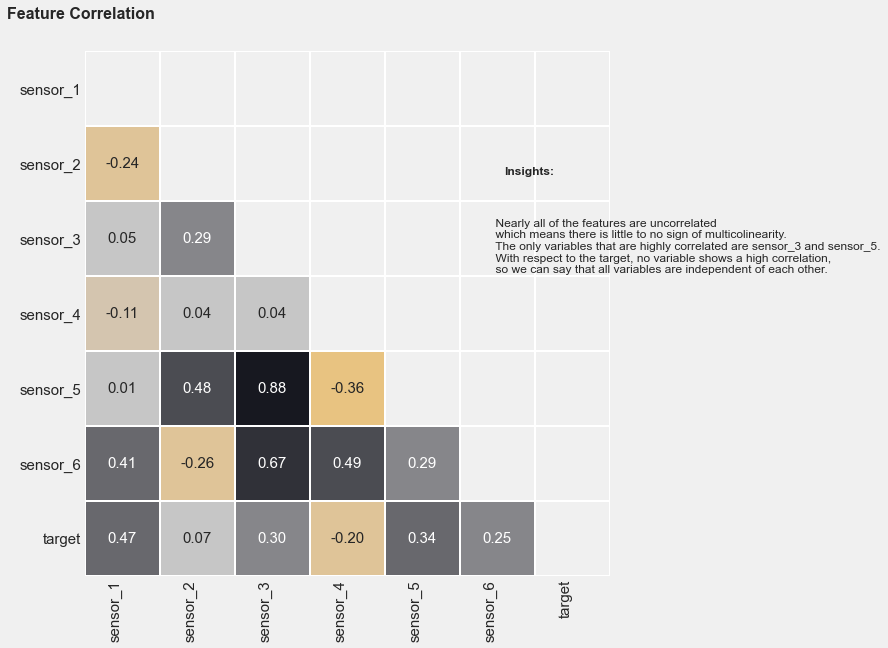

In [38]:
# create correlation map
corr_map = train.corr()

# create mask
mask = np.triu(np.ones_like(corr_map,dtype=bool))

# create correlation heatmap
fig = plt.figure(figsize=(15,9))

ax = sns.heatmap(
    data=corr_map,
    square=True,
    center=0, 
    linewidth=1,
    cmap=cust_color,
    cbar=False,
    mask=mask,
    annot=True,
    annot_kws = {"size": 15},
    fmt='.2f',
    cbar_kws={'shrink': 0.82}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)


# Title & Annotation
fig.text(0.2,0.93,'Feature Correlation',fontsize=16, fontweight='bold')
fig.text(0.66,0.69,'Insights:', fontsize=12, fontweight='bold')
fig.text(0.64,0.52,'''
    Nearly all of the features are uncorrelated 
    which means there is little to no sign of multicolinearity.
    The only variables that are highly correlated are sensor_3 and sensor_5.
    With respect to the target, no variable shows a high correlation, 
    so we can say that all variables are independent of each other. 
''', fontsize=12, fontweight='light')
ax.tick_params(labelsize = 15)
plt.show()

Como podemos observar en esta gráfica de correlación entre variables, la única correlación digna de mención es la que ofrece entre el sensor_5 y el sensor_3 de 0.88. 
**Corr(sensor_5, sesor_3)=0.88**

<a id ="2.6.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>2.6.2 Análisis del target</center></h2>

La variable `target` es la variable target de nuestro estudio. Es una variable categórica convertida en integer por los patrocinadores. Esta variable determina el tipo de problema al cual nos enfrentaremos en el modelado del algoritmo: `problema muticlasificador`.
A continuación, expondremos un gráfico con las variables que más se correlacionan con la variable `target`.

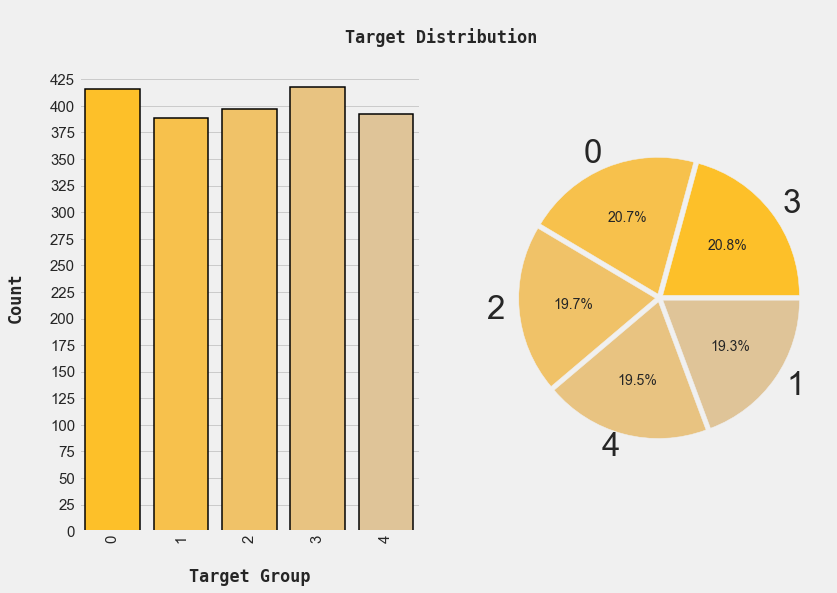

In [47]:
train_out.target.value_counts() 
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.barplot(x=train_out.target.value_counts().index, 
            y=train_out.target.value_counts().values, 
            palette=cust_color, ax=ax[0],
           edgecolor='black', linewidth=1.5, saturation=1.5)
ax[0].yaxis.set_major_locator(MaxNLocator(nbins=20))
ax[0].tick_params(axis='x', which='major', labelsize=10, rotation=90)
ax[0].set_ylabel('Count\n', weight='semibold', fontname = 'monospace', rotation=90)
ax[0].set_xlabel('\nTarget Group', weight='semibold', fontname = 'monospace')
ax[0].tick_params(labelsize = 15)
ax[1].pie(train_out.target.value_counts(), 
          labels = train_out.target.value_counts().index, 
          colors = cust_color, autopct='%1.1f%%',
        explode=[0.03 for i in train_out.target.value_counts().index])
ax[1].tick_params(labelsize = 15)

plt.suptitle('\nTarget Distribution', fontname = 'monospace', weight='bold')
plt.show()

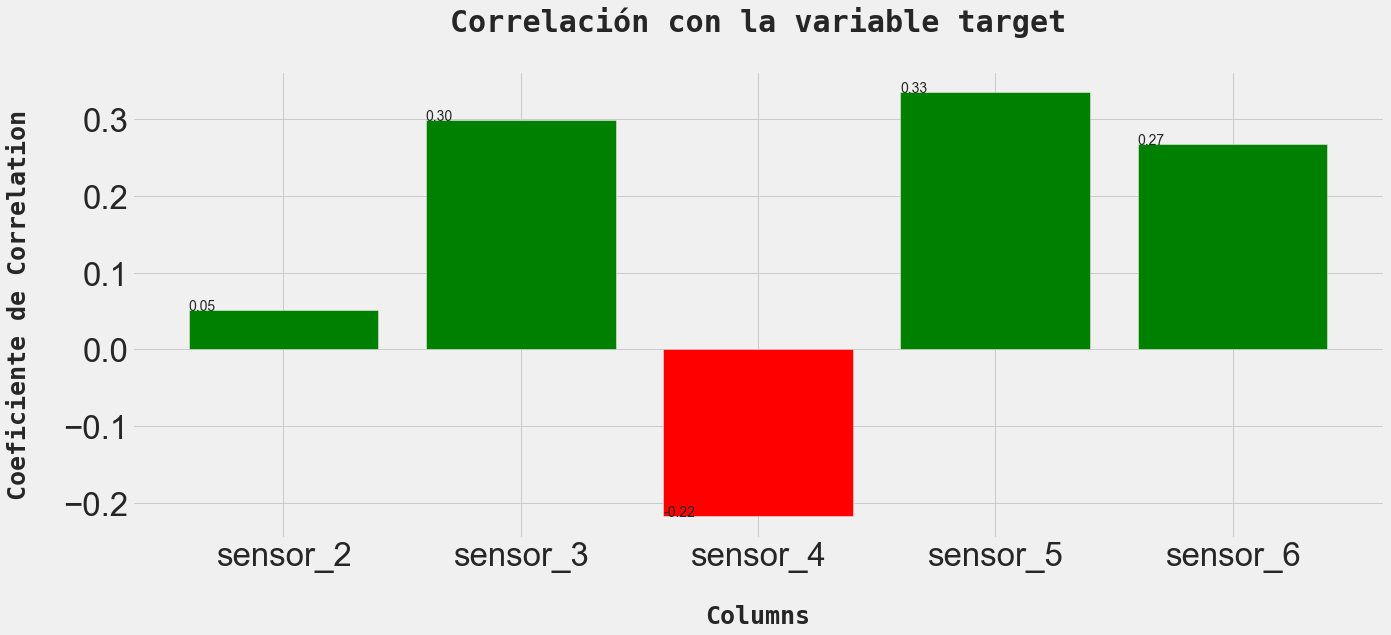

In [49]:
data = train_out[train_out.columns[0:]].corr()['target'][:-1]
data = data.to_frame()

# Fetch Index and Values From Data
index = data.index[1:]
values = data.values.flatten()[1:]

# Set figure size, title and labels
fig,ax = plt.subplots(figsize=(20,8))
ax.set_title("Correlación con la variable target\n", size=30,weight='semibold', fontname = 'monospace')
ax.set_xlabel("\nColumns", size=25,weight='semibold', fontname = 'monospace')
ax.set_ylabel("Coeficiente de Correlation\n", size=25,weight='semibold', fontname = 'monospace')

# Plot a Barplot
plot = plt.bar(index,values,color=['red' if x<0 else 'green' for x in values])

# Annotate Plots
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()),(p.get_x(),p.get_height()))

# Show plot
plt.show()

**Como se puede observar, no hay ninguna variable que tenga una correlación significativa con respecto a la variable target**. Esto nos da a entender, que las variables predictoras no solamente son independientes entre sí, si no que no hay multicolinealidad y que son independientes al target.

A continuación vamos a ver si la diferencia de los estados del target marca algún contraste entre las variables predictoras. **Debemos recordar que el estado Estable es el target 0.**

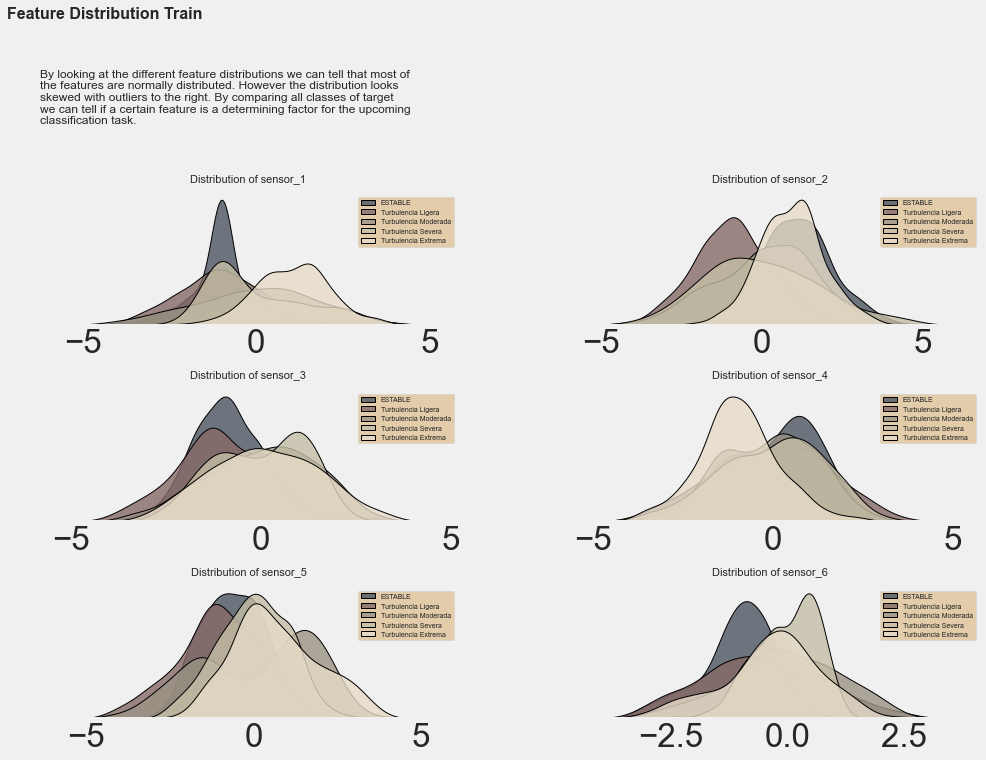

In [64]:
# get all features, split df into potability classes
feature_cols = [*train_out.columns.drop(labels='target')]
df_pot_0 = train_out[train_out['target'] == 0].copy()
df_pot_1 = train_out[train_out['target'] == 1].copy()
df_pot_2 = train_out[train_out['target'] == 2].copy()
df_pot_3 = train_out[train_out['target'] == 3].copy()
df_pot_4 = train_out[train_out['target'] == 4].copy()

fig = plt.figure(figsize=(15,9))

for idx, feature in enumerate(feature_cols):
    plt.subplot(3,2,idx+1)
    plt.title(f"Distribution of {feature}", size=11, y=1.05)
    plt.grid(color='gray', axis='x', linestyle=':', linewidth=1, alpha=0.5, zorder=0, dashes=(2,10))

    sns.kdeplot(
        data=df_pot_0, x=feature, shade=True, color=cmap_darks[0], 
        edgecolor='black', linewidth=1, alpha=0.8, label='ESTABLE'
    )

    sns.kdeplot(
        data=df_pot_1, x=feature, shade=True, color=cmap_darks[1], 
        edgecolor='black', linewidth=1, alpha=0.8, label='Turbulencia Ligera'
    )
    
    sns.kdeplot(
        data=df_pot_2, x=feature, shade=True, color=cmap_darks[2], 
        edgecolor='black', linewidth=1, alpha=0.8, label='Turbulencia Moderada'
    )
    
    sns.kdeplot(
        data=df_pot_3, x=feature, shade=True, color=cmap_darks[3], 
        edgecolor='black', linewidth=1, alpha=0.8, label='Turbulencia Severa'
    )
    
    sns.kdeplot(
        data=df_pot_4, x=feature, shade=True, color=cmap_darks[4], 
        edgecolor='black', linewidth=1, alpha=0.8, label='Turbulencia Extrema'
    )

    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])

    plt.legend(facecolor=cust_color[4], fontsize=7)
    sns.despine(left=True)

    ax.tick_params(labelsize = 10)
fig.subplots_adjust(wspace=0.25,hspace=0.5)
fig.text(0.05,1.15,'Feature Distribution Train', fontsize=16, fontweight='bold')
fig.text(0.08,0.97,'''
By looking at the different feature distributions we can tell that most of 
the features are normally distributed. However the distribution looks 
skewed with outliers to the right. By comparing all classes of target 
we can tell if a certain feature is a determining factor for the upcoming 
classification task.
''', fontsize=12, fontweight='light')


plt.show()

En esta gráfica vemos que las diferentes distribuciones de las variables predictoras según el tipo de target que presentan. El tipo `Estable` está representada con el color azul oscuro. Vemos cómo las otras oscilan a su alrededor. Hay dos observaciones interesantes en los sensores `1` y `4`. Vemos que:
- `sensor_1`: Se distingue el estado estable del resto porque el pico es más agudo y la varianza más pequeña.
- `sensor_4`: Se distringue el estado estable del estado turbulencia extrema ya que el primero tiene una media positiva y la segunda no. 

Estos podrían ser pistas más directas para ver el estado de vibración de los sensores de los cohetes. También sería una base para `futuras investigaciones`.


<a id ="3"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>3. Algoritmo</center></h1>

A nivel de Machine Learning, este problema es del tipo multiclasificación con inputs numéricas y un output formado por 5 categorías de tipo nominal.
A partir de este punto, podemos escoger muchos algoritmos diferentes y aplicar optimización con Optuna y también técnicas de ensamblado. No obstante, quería ir un paso más allá y aprovechando las técnicas de Deep Learning me he decidido usar las Gated Residual (GRN) y Variable Selection Networks (VSN) usando keras.io.  

¿Por qué usar GRN en este problema? Es debido a la idea principal de filtrar suavemente las características menos importantes para usar esta capacidad de aprendizaje en las características que tienen más peso. 

Los pasos para su realización son:
- 1. Crear una "incrustación de las características" (embedding features) como input al modelo.
- 2. Aplicar el GRN a cada característica teniendo en mente la idea principal de selección del modelo.
- 3. Aplicar el GRN a las características concatenadas.
- 4. Crear la suma ponderada del punto 2 y 3 como outpur de VSN
- 5. Hacer una predicción final con softmax. 

<a id ="3.1"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.1 Selección de características</center></h2>

Antes de pasar a realizar el algoritmo mencionado,vamor a ver qué características son las que presentan más o menos peso. Para seleccionar las características seguiremos las pautas propias del problema: 
- inputs numéricas
- output categórica nomial multiclase

El criterio de selección de características que escojo debido a las tipologías de los inputs y output es:

- **Mutual info classification:**

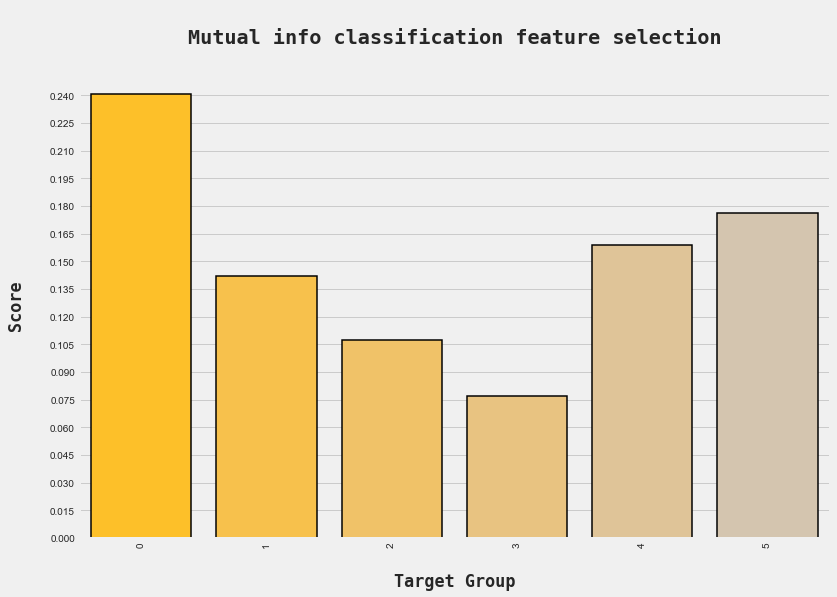

Feature 0: 0.240938
Feature 1: 0.141772
Feature 2: 0.107301
Feature 3: 0.076759
Feature 4: 0.159012
Feature 5: 0.176181


In [67]:
from matplotlib import pyplot
y = train_out['target']
X = train_out.drop('target',axis=1)

x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(X, y, 
                                                                            test_size=0.33, 
                                                                            random_state=2022)

# feature selection
X_train_mutual, X_test_mutal, mutual = select_features_mutual(x_train_split, y_train_split, 
                                                              x_test_split)



fig, ax = plt.subplots(1, 1, figsize=(12,8))
pyplot.title('\nMutual info classification feature selection\n', fontname = 'monospace', 
             weight='bold', loc='center')
sns.barplot([i for i in range(len(mutual.scores_))], mutual.scores_, palette=cust_color,
           edgecolor='black', linewidth=1.5, saturation=1.5)
ax.yaxis.set_major_locator(MaxNLocator(nbins=20))
ax.tick_params(axis='x', which='major', labelsize=10, rotation=90)
ax.set_ylabel('Score\n', weight='semibold', fontname = 'monospace', rotation=90)
ax.set_xlabel('\nTarget Group', weight='semibold', fontname = 'monospace')
ax.tick_params(labelsize = 10)
pyplot.show()

# what are scores for the features
for i in range(len(mutual.scores_)):
    print('Feature %d: %f' % (i, mutual.scores_[i]))

Como se puede observar, las 3 características destacables son: `sensor_1`, `sensor_6` y `sensor_4`. No obstante, si nos fijamos en el tamaño de la importancia de características vemos que entre la característica más significativa y la menor hay una distancia del 31.86%. Esto me dice que escogeremos todas las características para nuestro modelo.

<a id ="3.2"></a><h2 style="background:#75E6DA; border:0; border-radius: 12px; color:black"><center>3.2 Gated Residual (GRN)</center></h2>

<a id ="3.2.1"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>3.2.1 Creación del modelo</center></h2>

Vamos a empezar dividiendo los datos. Recordamos que tenemos un dataset ofrecido por el patrocinador sin la variable `target` para ver el desempeño de nuestro modelo al introducirle nuevos datos. _Se tiene que comentar que usaremos los datos originales y no los tratados por outliers, ya que daba peores resultaos en las predicciones._

In [173]:
# split dataframes for later modeling
y = train['target']
X = train.drop('target',axis=1)
X = X.copy()
y = y.copy()

X_test = test.copy()

A continuación, vamos a transformar la variable `target` a variable categórica.

In [174]:
le = LabelEncoder()
target = keras.utils.to_categorical(le.fit_transform(y))

In [175]:
gc.collect()
print(X.shape, y.shape, target.shape, X_test.shape)

(2100, 6) (2100,) (2100, 5) (900, 6)


Definiremos las funciones de ayuda para nuestro modelo: set_seed, plot_eval_results y plot_cm:
- `set_seed`: Sirve para escoger un seed aleatorio.
- `plot_eval_results`: Se muestra la diferencia del comportamiento entre train_loss y valid_loss para cada cv.
- `plot_cm`: Muestra tres gráficos que muestra las diferentes métricas.

In [176]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

Seguidaramente definitemos dos callbacks: `ReduceLROnPlateau` y `EarlyStopping`: usaremos val_get_f1 para monitorear la el callback de earlystopping.

In [178]:
# define callbacks
lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", 
    factor=0.5, 
    patience=5, 
    verbose=True
)

es = keras.callbacks.EarlyStopping(
    monitor="val_get_f1", 
    patience=10, 
    verbose=True, 
    mode="max", 
    restore_best_weights=True
)

Ahora vamos a definir el modelo `GRN` y `VariableSelection`:

In [179]:
class GatedLinearUnit(layers.Layer):
    def __init__(self, units):
        super(GatedLinearUnit, self).__init__()
        self.linear = layers.Dense(units)
        self.sigmoid = layers.Dense(units, activation="sigmoid")

    def call(self, inputs):
        return self.linear(inputs) * self.sigmoid(inputs)

class GatedResidualNetwork(layers.Layer):
    def __init__(self, units, dropout_rate):
        super(GatedResidualNetwork, self).__init__()
        self.units = units
        self.elu_dense = layers.Dense(units, activation="elu")
        self.linear_dense = layers.Dense(units)
        self.dropout = layers.Dropout(dropout_rate)
        self.gated_linear_unit = GatedLinearUnit(units)
        self.layer_norm = layers.LayerNormalization()
        self.project = layers.Dense(units)

    def call(self, inputs):
        x = self.elu_dense(inputs)
        x = self.linear_dense(x)
        x = self.dropout(x)
        if inputs.shape[-1] != self.units:
            inputs = self.project(inputs)
        x = inputs + self.gated_linear_unit(x)
        x = self.layer_norm(x)
        return x

class VariableSelection(layers.Layer):
    def __init__(self, num_features, units, dropout_rate):
        super(VariableSelection, self).__init__()
        self.grns = list()
        for idx in range(num_features):
            grn = GatedResidualNetwork(units, dropout_rate)
            self.grns.append(grn)
        self.grn_concat = GatedResidualNetwork(units, dropout_rate)
        self.softmax = layers.Dense(units=num_features, activation="softmax")

    def call(self, inputs):
        v = layers.concatenate(inputs)
        v = self.grn_concat(v)
        v = tf.expand_dims(self.softmax(v), axis=-1)

        x = []
        for idx, input in enumerate(inputs):
            x.append(self.grns[idx](input))
        x = tf.stack(x, axis=1)

        outputs = tf.squeeze(tf.matmul(v, x, transpose_a=True), axis=1)
        return outputs

En este punto, introduciremos los inputs y el modelo genérico:

In [180]:
def create_model_inputs():
    inputs = {}
    for feature_name in X.columns:
        inputs[feature_name] = layers.Input(
            name=feature_name, shape=(), dtype=tf.float32
        )
    return inputs

def encode_inputs(inputs, encoding_size):
    encoded_features = []
    for col in range(inputs.shape[1]):
        encoded_feature = tf.expand_dims(inputs[:, col], -1)
        encoded_feature = layers.Dense(units=encoding_size)(encoded_feature)
        encoded_features.append(encoded_feature)
    return encoded_features

def create_model(encoding_size, dropout_rate=0.15):
    inputs = layers.Input(len(X.columns))
    feature_list = encode_inputs(inputs, encoding_size)
    num_features = len(feature_list)

    features = VariableSelection(num_features, encoding_size, dropout_rate)(
        feature_list
    )

    outputs = layers.Dense(units=target.shape[-1], activation="softmax")(features)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

Ahora, introduciremos las excepciones para el algortimo:

In [181]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
    tf_strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print("Running on TPU:", tpu.master())
except:
    tf_strategy = tf.distribute.get_strategy()
    print(f"Running on {tf_strategy.num_replicas_in_sync} replicas")
    print("Number of GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Running on 1 replicas
Number of GPUs Available:  0


El patrocinador del modelo ha sugerido que la métrica para el estudio del problema sea `f1-score macro`:

In [182]:
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

En este punto vamos a ver el cuerpo del modelo con todo lo anterior incorporándolo:

In [183]:
seed = 2022
set_seed(seed)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

predictions = []
oof_preds = {'y_valid': list(), 'y_hat': list()}
scores_nn = {fold:None for fold in range(cv.n_splits)}

for fold, (idx_train, idx_valid) in enumerate(cv.split(X,y)):
    X_train, y_train = X.iloc[idx_train], target[idx_train]
    X_valid, y_valid = X.iloc[idx_valid], target[idx_valid]
    
    scl = RobustScaler()
    X_train = scl.fit_transform(X_train)
    X_valid = scl.transform(X_valid)
    
    with tf_strategy.scope():
        model = create_model(encoding_size=128)

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            loss=keras.losses.CategoricalCrossentropy(),
            metrics=[get_f1]
        )
        
    history = model.fit(
        X_train, y_train,
        validation_data=(X_valid, y_valid),
        epochs=90,
        batch_size=4096,
        shuffle=True,
        verbose=False,
        callbacks=[lr,es]
    )
    
    scores_nn[fold] = history.history
    
    oof_preds['y_valid'].extend(y.iloc[idx_valid])
    oof_preds['y_hat'].extend(model.predict(X_valid, batch_size=4096))
    
    prediction = model.predict(scl.transform(X_test), batch_size=4096) 
    predictions.append(prediction)
    
    #del model, prediction
    gc.collect()
    K.clear_session()
    
    print('_'*65)
    print(f"Fold {fold+1} || Min Val Loss: {np.min(scores_nn[fold]['val_loss'])}")
    print('_'*65)
    
print('_'*65)
overall_score = [np.min(scores_nn[fold]['val_loss']) for fold in range(cv.n_splits)]
print(f"Overall Mean Validation Loss: {np.mean(overall_score)}")

Seed set to: 2022
Restoring model weights from the end of the best epoch: 42.
Epoch 52: early stopping
_________________________________________________________________
Fold 1 || Min Val Loss: 0.7744452357292175
_________________________________________________________________

Epoch 68: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Restoring model weights from the end of the best epoch: 58.
Epoch 68: early stopping
_________________________________________________________________
Fold 2 || Min Val Loss: 0.6103838086128235
_________________________________________________________________
Restoring model weights from the end of the best epoch: 62.
Epoch 72: early stopping
_________________________________________________________________
Fold 3 || Min Val Loss: 0.7881468534469604
_________________________________________________________________

Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 50: ReduceLROnPlateau reducing learning

<a id ="3.2.2"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>3.2.2 Evaluación y Resultados</center></h2>

Ahora vamos a representar visualmente las soluciones y ver si nuestro modelo a rendido correctamente según la métrica f1-score:

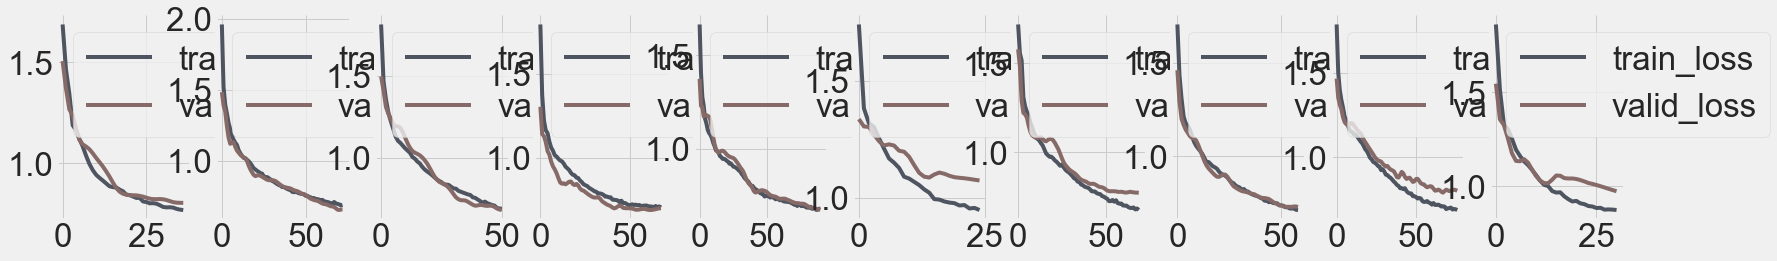

In [132]:
plot_eval_results(scores_nn, cv.n_splits)

Como se puede observar en la gráfica anterior, se puede ver el comportamiento de `train_loss` y `valid_loss`. Se observa que se comportan de forma parecida lo que es buena señal con respecto al rendimiento del problema para datos target conocidos. 

A continuación vamos a ver 3 gráficos basados en los rendimientos del modelo según 3 métricas. 

In [192]:
# prepare oof_predictions
oof_y_true = np.array(oof_preds['y_valid'])
oof_y_hat = le.inverse_transform(np.argmax(oof_preds['y_hat'], axis=1))

# create confusion matrix, calculate accuracy, recall & precision
cm = pd.DataFrame(data=confusion_matrix(oof_y_true, oof_y_hat, labels=le.classes_), 
                  index=le.classes_, columns=le.classes_)

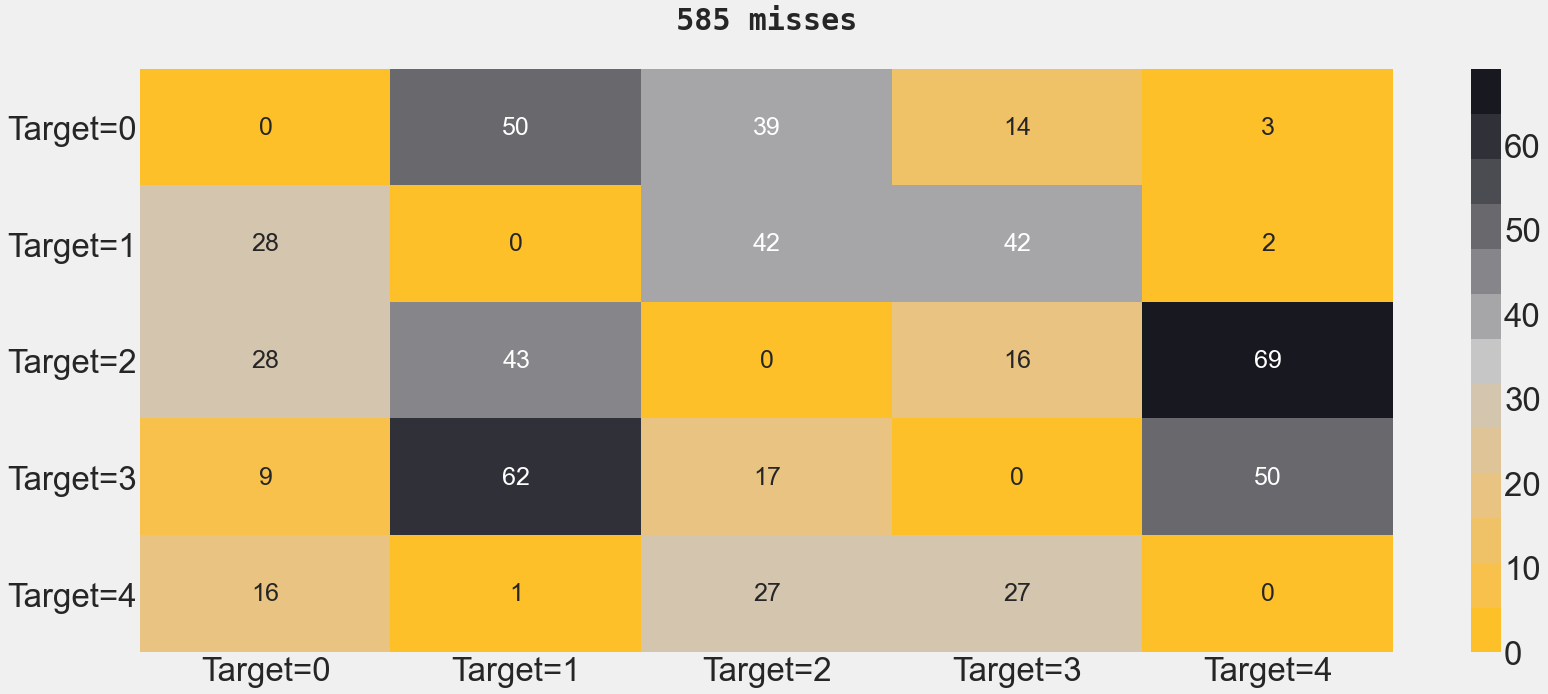

In [195]:
cm = confusion_matrix(oof_y_true, oof_y_hat)
ix = np.arange(cm.shape[0])
cm[ix, ix] = 0
col_names = [f'Target={cls}' for cls in le.classes_]
cm = pd.DataFrame(cm, columns=col_names, index=col_names)
fig = plt.figure(figsize=(25,10))
sns.heatmap(cm, cmap=cust_color, annot_kws = {"size": 25},annot=True, fmt='d')
#print(cm.sum().sum())
plt.title(' 585 misses \n', size=30, weight='semibold', fontname = 'monospace');

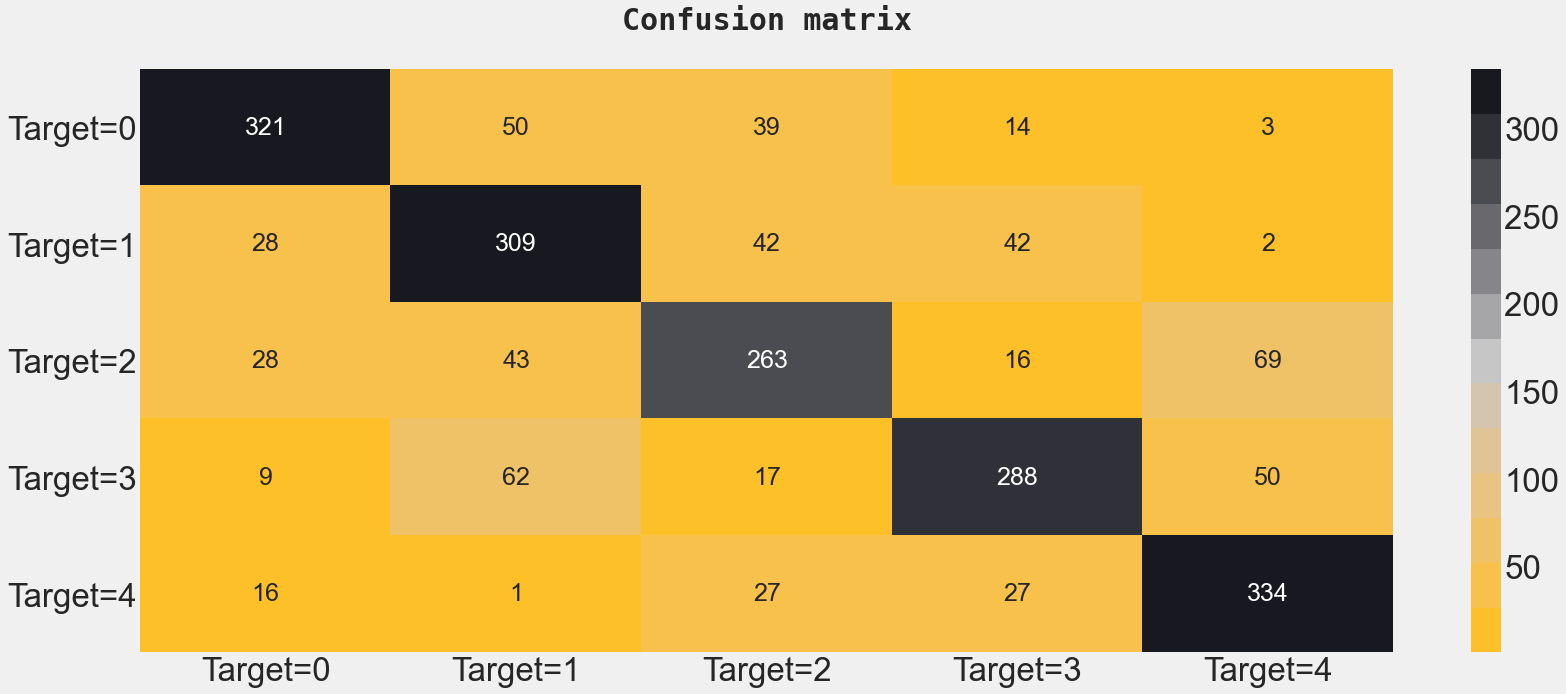

In [186]:
cm = confusion_matrix(oof_y_true, oof_y_hat)
ix = np.arange(cm.shape[0])
col_names = [f'Target={cls}' for cls in le.classes_]
cm = pd.DataFrame(cm, columns=col_names, index=col_names)
fig = plt.figure(figsize=(25,10))
sns.heatmap(cm, cmap=cust_color,annot_kws = {"size": 25}, annot=True, fmt='d')
plt.title('Confusion matrix\n', size=30,weight='semibold', fontname = 'monospace');

In [187]:
print(classification_report(oof_y_true, oof_y_hat))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       427
           1       0.66      0.73      0.70       423
           2       0.68      0.63      0.65       419
           3       0.74      0.68      0.71       426
           4       0.73      0.82      0.77       405

    accuracy                           0.72      2100
   macro avg       0.72      0.72      0.72      2100
weighted avg       0.72      0.72      0.72      2100



Como podemos observar, el 72% de las muestras están correctamente clasificadas. Los tipos extremo y estable se clasifican el 77% de las muestras. Deberíamos intentar, para futuros estudios, hacer alguna función para medir mejor los valores intermedios.

<a id ="3.2.3"></a><h2 style="background:#D4F1F4; border:0; border-radius: 12px; color:black"><center>3.2.3 Predicción de target en el dataset test</center></h2>

En este apartado, vamos a ver si de verdad el modelo es tan bueno como vemos comentado. Usaremos el dataset `test` el cual carece de la variable target. También incluiremos una gráfica de distribución de categorías para este nuevo conjunto de datos.

In [188]:
final_predictions = le.inverse_transform(np.argmax(sum(predictions), axis=1))

In [201]:
submission = test.copy()
submission['y_hat'] = final_predictions
submission['y_hat'].to_csv('predicciones_cohete.csv', index=False)
submission.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,y_hat
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338,1
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068,3
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596,2
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822,0
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644,3


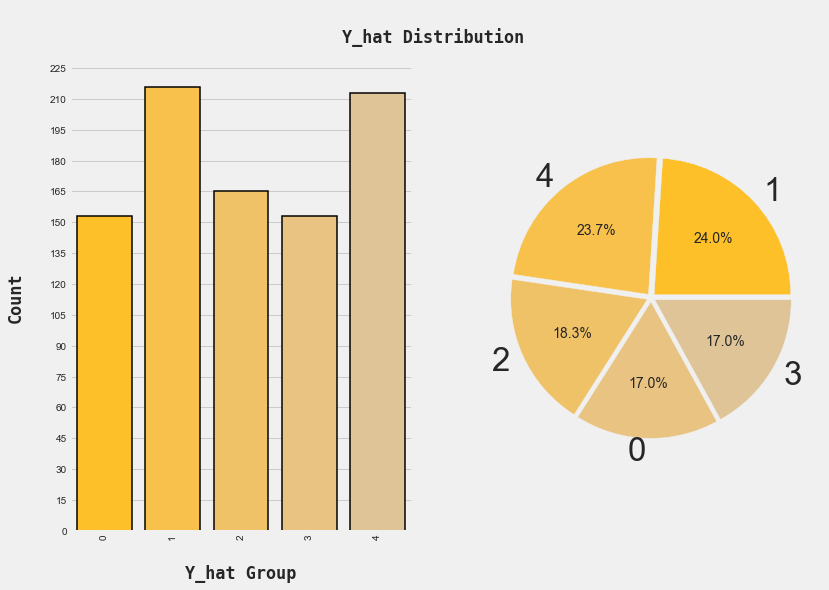

In [191]:
submission.y_hat.value_counts() 
fig, ax = plt.subplots(1, 2, figsize=(12,8))
sns.barplot(x=submission.y_hat.value_counts().index, 
            y=submission.y_hat.value_counts().values, 
            palette=cust_color, ax=ax[0],
           edgecolor='black', linewidth=1.5, saturation=1.5)
ax[0].yaxis.set_major_locator(MaxNLocator(nbins=20))
ax[0].tick_params(axis='x', which='major', labelsize=10, rotation=90)
ax[0].set_ylabel('Count\n', weight='semibold', fontname = 'monospace', rotation=90)
ax[0].set_xlabel('\nY_hat Group', weight='semibold', fontname = 'monospace')
ax[0].tick_params(labelsize = 10)
ax[1].pie(submission.y_hat.value_counts(), 
          labels = submission.y_hat.value_counts().index, 
          colors = cust_color, autopct='%1.1f%%',
        explode=[0.03 for i in submission.y_hat.value_counts().index])
ax[1].tick_params(labelsize = 10)

plt.suptitle('\nY_hat Distribution', fontname = 'monospace', weight='bold')
plt.show()

Como se puede observar en esta gráfica, el 24% de la muestra es clasificada tanto para target `turbulencia Ligera` como para `turbulencia extrema`. 

<a id ="4"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>4. Conclusiones finales</center></h1>

El estudio tenía por objetivo determinar qué tipo de turbulencia obteníamos según las vibraciones recogidas por los diferentes sensores. Hemos demostrado que hay correlación fuerte entre el sensor_3 y el sensor_5. No obstante, no hay características significativas para determinar el target. 
También hemos indagado en la idea siguiente: a parte del objetivo propuesto por el patrocinador, hemos de tener en cuenta que el estado ideal es el `Estable`. Esto implica que las otras distribuciones de variables se deben comparar con el estado ideal. Vemos algunas observaciones: el sensor_1 y el sensor_4 puede determinar fácilmente si están cerca del estado `Estable` o no. 
Para el estudio de nuestros datos se ha usado el algoritmo de Gated Residual y Variable Selection Networks debido a que les da importancia las características que tienen menor peso en el dataset. 
Seguidamente, hemos visto que según la métrica f1-score(macro), el modelo presenta un 72% de eficacia considerando a futuros trabajos poder mejorarla.  
Finalmente, hemos introducido nuevos datos en nuestro algoritmo almacenados en un csv `results.csv` donde se puede ver las predicciones del `test`. Observamos que la distribución de los resultados del target son homogeneos, por lo que confiamos en los resultados obtenidos.
Concluimos que es un buen modelo con futuras mejoras agregando más muestras a nuestro modelo. 

<a id ="5"></a><h1 style="background:#05445E; border:0; border-radius: 12px; color:#D3D3D3"><center>5. Referencias finales</center></h1>

[1] https://es.wikipedia.org/wiki/SpaceX

[2] https://actualidadaeroespacial.com/las-pruebas-de-vibracion-para-el-cohete-lunar-ayudan-a-garantizar-viajes-seguros-en-el-camino-al-espacio/

